#  **Mathematical Modeling of Water Quality in Pakistan**

##**Introduction**
Access to safe drinking water is a fundamental human right and a critical factor in public health and socio-economic development. However, water quality issues such as microbiological contamination, chemical pollutants, and physical parameters like turbidity continue to pose significant challenges globally. This problem is huge particularly in developing countries like Pakistan.

This project aims to analyze a water quality dataset:
- to identify key contaminants,
- assess trends over time,
- rule based model to predict water safety

 By leveraging statistical and visual analysis, we aim to provide insights into the factors contributing to unsafe water and guide policymakers, water supply agencies, and communities in addressing these challenges effectively.



##**Background**
Water quality monitoring is essential to ensure that drinking water meets national and international standards, such as those set by the World Health Organization (WHO) and the Pakistan Standards Quality Control Authority (PSQCA). Poor water quality has been linked to numerous health issues, including waterborne diseases like cholera, dysentery, and typhoid, which disproportionately affect vulnerable populations.

The dataset provided contains information on water samples collected from various districts in Pakistan over multiple years. Parameters include microbiological indicators (e.g., Coliforms, E. coli), chemical contaminants (e.g., Nitrate, Fluoride, Arsenic), and physical characteristics (e.g., Turbidity, pH). The goal of this project is to:

Assess the overall water quality status.
Identify regions with the highest contamination levels.
Highlight trends in water quality over time.
Provide actionable recommendations to mitigate contamination risks.

load nessaccary packages and library

In [3]:
#import necassay packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# load the data

water_Qdata = pd.read_csv('Water_quality_data.csv')

water_Qdata.head()

,Location,GPS Coordinates,Unnamed: 2,Source Type,Sampling Date,Grid Size (kmÂ²),pH,DO (mg/L),Turbidity (NTU),TDS (mg/L),...,Lead (ppb),Copper (ppm),Zinc (ppm),Fecal Coliform (MPN/100mL),Total Coliform (MPN/100mL),POPs Detected,Water Treatment,Overall Water Quality,Water Quality Index (WQI),Source
0,Islamabad,33.6844,73.0479,Surface Water,2015-16,7.8,6.5,8.0,500,150,...,0.12,0.04,74.0,41,DDT,Aldrin,Functional,Unsafe,65,PCRWR 2015-16
1,Lahore,31.5497,74.3436,Groundwater,2015-16,7.5,5.8,15.0,550,160,...,0.17,0.05,100.0,50,Arsenic,Heptachlor,NaN,Unsafe,60.3,PCRWR 2015-16
2,Karachi,24.8607,67.0011,Surface Water,2015-16,7.0,4.8,22.0,600,170,...,0.28,0.06,93.0,36,Dieldrin,Endrin,Chlorination,Unsafe,55.2,PCRWR 2015-16
3,Peshawar,34.0151,71.5249,Groundwater,2015-16,7.1,7.0,6.0,480,140,...,0.10,0.02,50.0,50,Iron Contamination,Filtration,Unsafe,62.5,PCRWR 2015-16,NaN
4,Quetta,30.1798,66.9750,Groundwater,2015-16,7.3,6.9,10.0,540,155,...,0.15,0.04,68.0,47,Fluoride,Nitrate,NaN,Unsafe,58.7,PCRWR 2015-16


In [25]:
# CHeck basiic info  and dttypes of colums

water_Qdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    15 non-null     object 
 1   GPS Coordinates             15 non-null     object 
 2   Unnamed: 2                  10 non-null     float64
 3   Source Type                 15 non-null     object 
 4   Sampling Date               15 non-null     object 
 5   Grid Size (kmÂ²)            15 non-null     float64
 6   pH                          15 non-null     float64
 7   DO (mg/L)                   15 non-null     float64
 8   Turbidity (NTU)             15 non-null     int64  
 9   TDS (mg/L)                  15 non-null     int64  
 10  TSS (mg/L)                  15 non-null     int64  
 11  EC (ÂµS/cm)                 15 non-null     float64
 12  BOD (mg/L)                  15 non-null     float64
 13  COD (mg/L)                  15 non-nu

In [26]:
# some colums are not in correct data type so we have to convert thier data type first.





# Convert data types
water_Qdata['Sampling Date'] = pd.to_datetime(water_Qdata['Sampling Date'], errors='coerce')
water_Qdata['Total Coliform (MPN/100mL)'] = pd.to_numeric(water_Qdata['Total Coliform (MPN/100mL)'], errors='coerce')
water_Qdata['Water Quality Index (WQI)'] = pd.to_numeric(water_Qdata['Water Quality Index (WQI)'], errors='coerce')



# combine gps colums as there are 2 colums for it .

water_Qdata['GPS Coordinates'] = water_Qdata['GPS Coordinates'].astype(str)
water_Qdata['Unnamed: 2'] = water_Qdata['Unnamed: 2'].astype(str)
water_Qdata['GPS'] = water_Qdata['GPS Coordinates'] + ', ' + water_Qdata['Unnamed: 2']


# Drop unnecessary columns
water_Qdata.drop(['GPS Coordinates', 'Unnamed: 2'], axis=1, inplace=True)


# Handle missing values
for col in ['Total Coliform (MPN/100mL)', 'POPs Detected', 'Water Treatment', 'Source','Water Quality Index (WQI)']:
    if water_Qdata[col].dtype == 'object':
      water_Qdata[col].fillna(water_Qdata[col].mode()[0], inplace=True)
    elif water_Qdata[col].dtype in ['int64', 'float64']:
      water_Qdata[col].fillna(water_Qdata[col].mean(), inplace=True)

#Now fill other missing values
water_Qdata.fillna('Unknown', inplace=True)


#Verify Missing Values
print(water_Qdata.isnull().sum())

# Display data types after conversion
water_Qdata.dtypes


Location                      0
Source Type                   0
Sampling Date                 0
Grid Size (kmÂ²)              0
pH                            0
DO (mg/L)                     0
Turbidity (NTU)               0
TDS (mg/L)                    0
TSS (mg/L)                    0
EC (ÂµS/cm)                   0
BOD (mg/L)                    0
COD (mg/L)                    0
Arsenic (ppb)                 0
Lead (ppb)                    0
Copper (ppm)                  0
Zinc (ppm)                    0
Fecal Coliform (MPN/100mL)    0
Total Coliform (MPN/100mL)    0
POPs Detected                 0
Water Treatment               0
Overall Water Quality         0
Water Quality Index (WQI)     0
Source                        0
GPS                           0
dtype: int64


<ipython-input-26-a30ebf6c48de>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  water_Qdata['Sampling Date'] = pd.to_datetime(water_Qdata['Sampling Date'], errors='coerce')
<ipython-input-26-a30ebf6c48de>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_Qdata[col].fillna(water_Qdata[col].mean(), inplace=True)
<ipython-input-26-a30ebf6c48de>:28: FutureWarning: A value is trying to b

,0
Location,object
Source Type,object
Sampling Date,object
Grid Size (kmÂ²),float64
pH,float64
DO (mg/L),float64
Turbidity (NTU),int64
TDS (mg/L),int64
TSS (mg/L),int64
EC (ÂµS/cm),float64


In [27]:
# Display basic information about the data
print(water_Qdata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    15 non-null     object 
 1   Source Type                 15 non-null     object 
 2   Sampling Date               15 non-null     object 
 3   Grid Size (kmÂ²)            15 non-null     float64
 4   pH                          15 non-null     float64
 5   DO (mg/L)                   15 non-null     float64
 6   Turbidity (NTU)             15 non-null     int64  
 7   TDS (mg/L)                  15 non-null     int64  
 8   TSS (mg/L)                  15 non-null     int64  
 9   EC (ÂµS/cm)                 15 non-null     float64
 10  BOD (mg/L)                  15 non-null     float64
 11  COD (mg/L)                  15 non-null     float64
 12  Arsenic (ppb)               15 non-null     float64
 13  Lead (ppb)                  15 non-nu

In [28]:
# Check for missing values
print(water_Qdata.isnull().sum())

Location                      0
Source Type                   0
Sampling Date                 0
Grid Size (kmÂ²)              0
pH                            0
DO (mg/L)                     0
Turbidity (NTU)               0
TDS (mg/L)                    0
TSS (mg/L)                    0
EC (ÂµS/cm)                   0
BOD (mg/L)                    0
COD (mg/L)                    0
Arsenic (ppb)                 0
Lead (ppb)                    0
Copper (ppm)                  0
Zinc (ppm)                    0
Fecal Coliform (MPN/100mL)    0
Total Coliform (MPN/100mL)    0
POPs Detected                 0
Water Treatment               0
Overall Water Quality         0
Water Quality Index (WQI)     0
Source                        0
GPS                           0
dtype: int64


In [29]:
# now we have clean our data
water_Qdata.head()


,Location,Source Type,Sampling Date,Grid Size (kmÂ²),pH,DO (mg/L),Turbidity (NTU),TDS (mg/L),TSS (mg/L),EC (ÂµS/cm),...,Copper (ppm),Zinc (ppm),Fecal Coliform (MPN/100mL),Total Coliform (MPN/100mL),POPs Detected,Water Treatment,Overall Water Quality,Water Quality Index (WQI),Source,GPS
0,Islamabad,Surface Water,Unknown,7.8,6.5,8.0,500,150,7100,3.2,...,0.04,74.0,41,107.5,Aldrin,Functional,Unsafe,65.000000,PCRWR 2015-16,"33.6844, 73.0479"
1,Lahore,Groundwater,Unknown,7.5,5.8,15.0,550,160,6000,4.5,...,0.05,100.0,50,107.5,Heptachlor,Chlorination,Unsafe,60.300000,PCRWR 2015-16,"31.5497, 74.3436"
2,Karachi,Surface Water,Unknown,7.0,4.8,22.0,600,170,5000,5.0,...,0.06,93.0,36,107.5,Endrin,Chlorination,Unsafe,55.200000,PCRWR 2015-16,"24.8607, 67.0011"
3,Peshawar,Groundwater,Unknown,7.1,7.0,6.0,480,140,6800,2.9,...,0.02,50.0,50,107.5,Filtration,Unsafe,62.5,60.809091,PCRWR 2015-16,"34.0151, 71.5249"
4,Quetta,Groundwater,Unknown,7.3,6.9,10.0,540,155,5600,3.8,...,0.04,68.0,47,107.5,Nitrate,Chlorination,Unsafe,58.700000,PCRWR 2015-16,"30.1798, 66.975"


In [30]:
import matplotlib.pyplot as plt
# Exploratory Data Analysis

# Summary statistics
print(water_Qdata.describe())

       Grid Size (kmÂ²)         pH  DO (mg/L)  Turbidity (NTU)  TDS (mg/L)  \
count         15.000000  15.000000  15.000000        15.000000   15.000000   
mean          13.600000   6.200000  12.440000       472.866667  205.400000   
std           23.906963   0.812404   5.072306       190.325611  130.075143   
min            7.000000   4.600000   6.000000         9.000000  140.000000   
25%            7.150000   5.850000   8.500000       500.000000  152.500000   
50%            7.400000   6.200000  12.000000       540.000000  160.000000   
75%            7.550000   6.700000  14.500000       565.000000  166.500000   
max          100.000000   7.400000  22.000000       600.000000  530.000000   

        TSS (mg/L)  EC (ÂµS/cm)  BOD (mg/L)  COD (mg/L)  Arsenic (ppb)  \
count    15.000000    15.000000   15.000000   15.000000      15.000000   
mean   5359.666667   770.126667   25.566667    5.920000       7.726667   
std    2200.781084  2022.618285    9.060563    9.036213       3.837124   
m

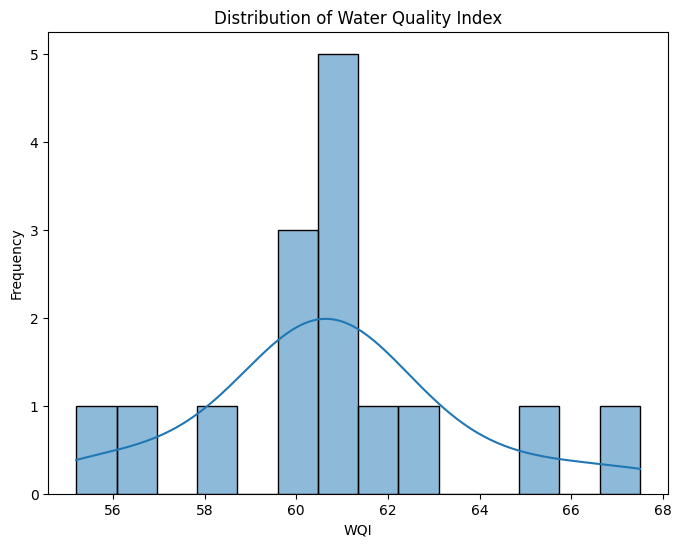

In [31]:
# Distribution of Water Quality Index (WQI)
plt.figure(figsize=(8, 6))
sns.histplot(water_Qdata['Water Quality Index (WQI)'], kde=True)
plt.title('Distribution of Water Quality Index')
plt.xlabel('WQI')
plt.ylabel('Frequency')
plt.show()

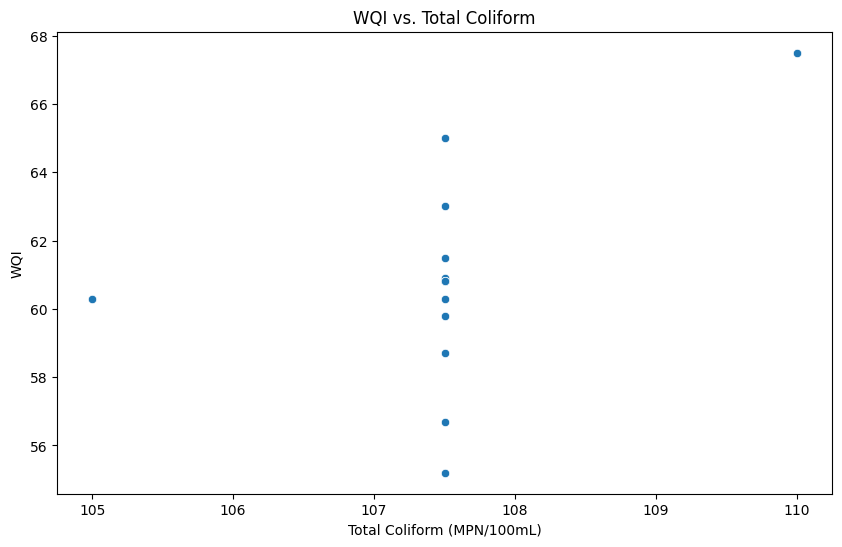

In [32]:

# Relationship between WQI and other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Coliform (MPN/100mL)', y='Water Quality Index (WQI)', data=water_Qdata)
plt.title('WQI vs. Total Coliform')
plt.xlabel('Total Coliform (MPN/100mL)')
plt.ylabel('WQI')
plt.show()

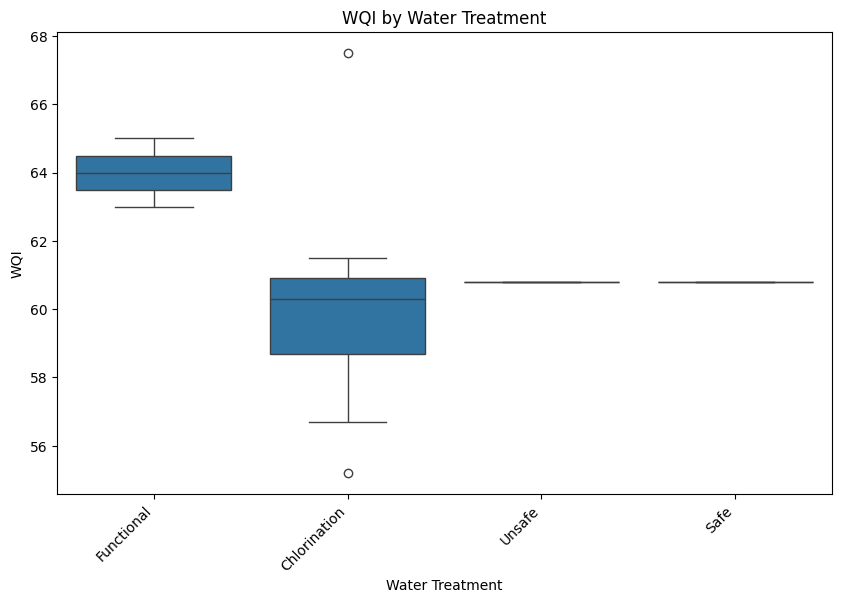

In [33]:
# Boxplot of WQI by Water Treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Water Treatment', y='Water Quality Index (WQI)', data=water_Qdata)
plt.title('WQI by Water Treatment')
plt.xlabel('Water Treatment')
plt.ylabel('WQI')
plt.xticks(rotation=45, ha='right')
plt.show()

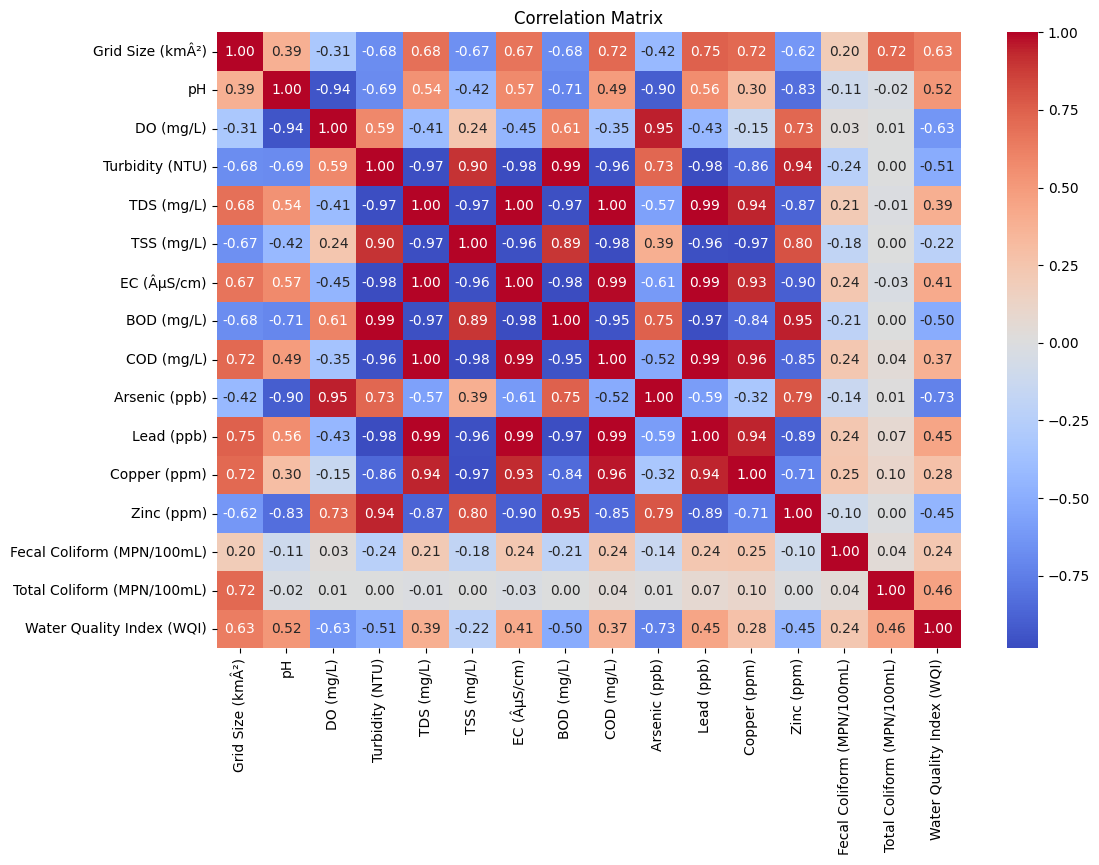

In [37]:

# Correlation matrix, using only numeric columns
correlation_matrix = water_Qdata[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

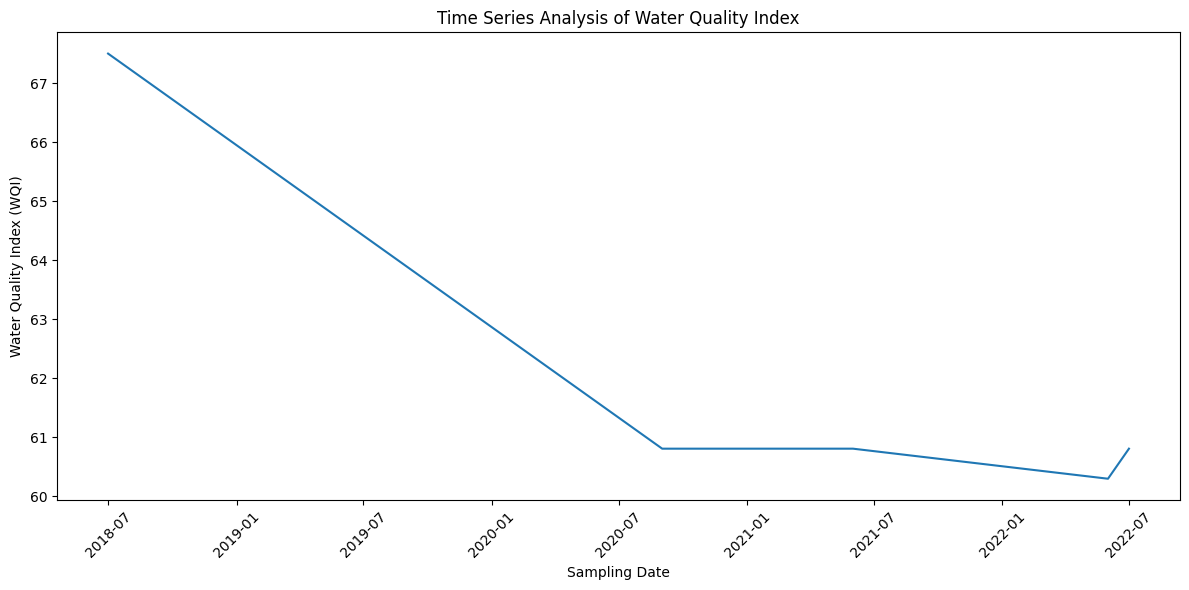

Error loading shapefile: ne_110m_admin_0_countries.shp: No such file or directory
Attempting to download and extract the shapefile...
Before wget:
drive  sample_data  Water_quality_data.csv


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import os
import zipfile

# Assuming 'water_Qdata' DataFrame is already loaded and cleaned as in the previous code.

# Time series analysis of WQI over time
water_Qdata['Sampling Date'] = pd.to_datetime(water_Qdata['Sampling Date'], errors='coerce')
water_Qdata = water_Qdata.dropna(subset=['Sampling Date']) # remove rows where the date could not be parsed
water_Qdata = water_Qdata.sort_values(by='Sampling Date')


plt.figure(figsize=(12, 6))
plt.plot(water_Qdata['Sampling Date'], water_Qdata['Water Quality Index (WQI)'])
plt.xlabel('Sampling Date')
plt.ylabel('Water Quality Index (WQI)')
plt.title('Time Series Analysis of Water Quality Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Geographic analysis (requires geopandas)
# Install geopandas if not already installed
!pip install geopandas

# Create a geometry column for the GPS coordinates
geometry = [Point(xy) for xy in water_Qdata['GPS'].str.split(', ').apply(lambda x: [float(x[1]),float(x[0])])]
gdf = gpd.GeoDataFrame(water_Qdata, geometry=geometry, crs="EPSG:4326") #Assuming WGS84

# Download the shapefile if it doesn't exist
shapefile_zip = "ne_110m_admin_0_countries.zip"
shapefile_name = "ne_110m_admin_0_countries.shp"

# Define extraction directory. Files will be extracted to the same directory as the notebook.
extraction_dir = "."

# Load the shapefile
try:
    world = gpd.read_file(shapefile_name)
except Exception as e:
    print(f"Error loading shapefile: {e}")
    print("Attempting to download and extract the shapefile...")

    # Remove potentially corrupted files from previous attempts
    if os.path.exists(shapefile_zip):
        os.remove(shapefile_zip)
    if os.path.exists(shapefile_name):
        os.remove(shapefile_name)

    print("Before wget:")
    !ls





In [48]:
# save this data frame into csv file for later use.

water_Qdata.to_csv('processed_data.csv', index=False)


##**Mathematical Model**
The model will classify water samples as "Safe" or "Unsafe" based on whether they meet the above standards. We can represent this as a **binary classification problem** using a weighted scoring system.



**Rule-Based Model**
A simple rule-based model assigns a score to each parameter based on whether it exceeds the permissible limit. If the total score exceeds a threshold, the water is classified as unsafe.

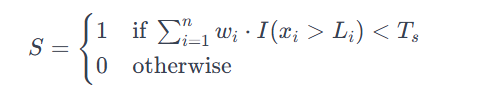


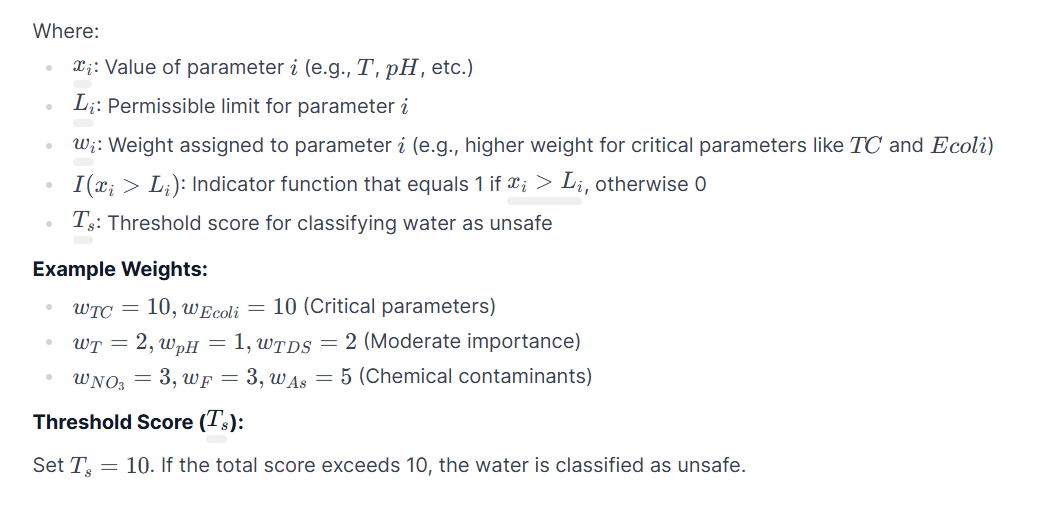

In [53]:
# Mathametical model for our data

def rule_based_model(sample):
    # Extract parameters from the sample.  Note: This assumes the input 'sample' is a dictionary or Series-like object.
    # Adapt these to match the actual column names in your DataFrame.
    try:
        turbidity = sample['Turbidity']
        ph = sample['pH']
        tds = sample['TDS']
        nitrate = sample['NO3']
        fluoride = sample['F']
        arsenic = sample['As']
        coliforms = sample['Total Coliform (MPN/100mL)'] # Use the correct column name
        #ecoli = sample['E. coli']  # Assuming 'E. coli' column exists; if not remove this line and related logic
    except KeyError as e:
        print(f"Error: Missing key in input sample: {e}")
        return None  # Or handle the error in a different way


    # Initialize score
    score = 0

    # Add scores based on thresholds - adjust thresholds as needed based on domain expertise
    if turbidity > 5:
        score += 2
    if not (6.5 <= ph <= 8.5):
        score += 1
    if tds > 1000:
        score += 2
    if nitrate > 10:
        score += 3
    if fluoride > 1.5:
        score += 3
    if arsenic > 10:  # Adjust threshold if needed
        score += 5
    if coliforms > 0 : # Adjust threshold if needed
        score += 10
    #if ecoli > 0:  # Remove if 'E. coli' is not present
    #    score += 10

    # Classify water quality
    if score < 10:
        return "Safe"
    elif score < 20: # Adding another category
        return "Potentially Unsafe"
    else:
        return "Unsafe"




In [54]:
# Example usage (assuming 'water_Qdata' DataFrame is loaded):
# You can apply the function to your dataframe like this:
# water_Qdata['Water Quality'] = water_Qdata.apply(rule_based_model, axis=1)


# Example using a single sample (dictionary):
sample_data = {
    'Turbidity': 3,
    'pH': 7,
    'TDS': 500,
    'NO3': 5,
    'F': 0.8,
    'As': 2,
    'Total Coliform (MPN/100mL)': 10,  # Using the correct key here
    #'E. coli': 0,
}

water_quality_classification = rule_based_model(sample_data)
print(f"The water quality is classified as: {water_quality_classification}")


The water quality is classified as: Potentially Unsafe
